## Problem 3

Submitted by: 

Name: Pushya Shree Konasale Jayaramu

Matriculation no: 03776652

## 3.1 Preprocess and Splitting of Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [6]:
data = pd.read_csv(r"C:\Users\User15\OneDrive\Desktop\Data Analysis\bike.csv")
data.head()
#data.isnull()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
#Data Processing

#Standardising the numerical variables
numeric_variables = ['temp', 'atemp', 'hum', 'windspeed']
scaler = StandardScaler()
data[numeric_variables] = scaler.fit_transform(data[numeric_variables])

#Categorical variables transformation to dummy
categorical_variables = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit']
data = pd.get_dummies(data, columns=categorical_variables)

In [9]:
#Splitting the dataset with random state
data = data.drop(['instant', 'casual', 'registered'], axis=1) #removing extra coloumns
X = data.drop("cnt", axis=1) #exclude dependent variables
y = data["cnt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
total_samples = len(data)
train_samples = len(X_train)
test_samples = len(X_test)

train_percentage = (train_samples / total_samples) * 100
test_percentage = (test_samples / total_samples) * 100

print(f"Total samples: {total_samples}")
print(f"Training samples: {train_samples} ({train_percentage:.2f}%)")
print(f"Test samples: {test_samples} ({test_percentage:.2f}%)")

Total samples: 17379
Training samples: 13903 (80.00%)
Test samples: 3476 (20.00%)


## 3.2 Exploratory Data Analysis

In [13]:
print(data.describe())

         workingday          temp         atemp           hum     windspeed  \
count  17379.000000  1.737900e+04  1.737900e+04  1.737900e+04  1.737900e+04   
mean       0.682721  1.569989e-16 -1.831654e-16 -3.074562e-16  1.537281e-16   
std        0.465431  1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00   
min        0.000000 -2.477205e+00 -2.768625e+00 -3.251166e+00 -1.553889e+00   
25%        0.000000 -8.153035e-01 -8.290895e-01 -7.631431e-01 -6.996886e-01   
50%        1.000000  1.564696e-02  5.251758e-02  1.436398e-02  3.189880e-02   
75%        1.000000  8.465975e-01  8.462549e-01  7.918711e-01  5.198962e-01   
max        1.000000  2.612367e+00  3.050563e+00  1.932215e+00  5.399871e+00   

                cnt      season_1      season_2      season_3      season_4  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean     189.463088      0.244088      0.253697      0.258703      0.243512   
std      181.387599      0.429557      0.435139    

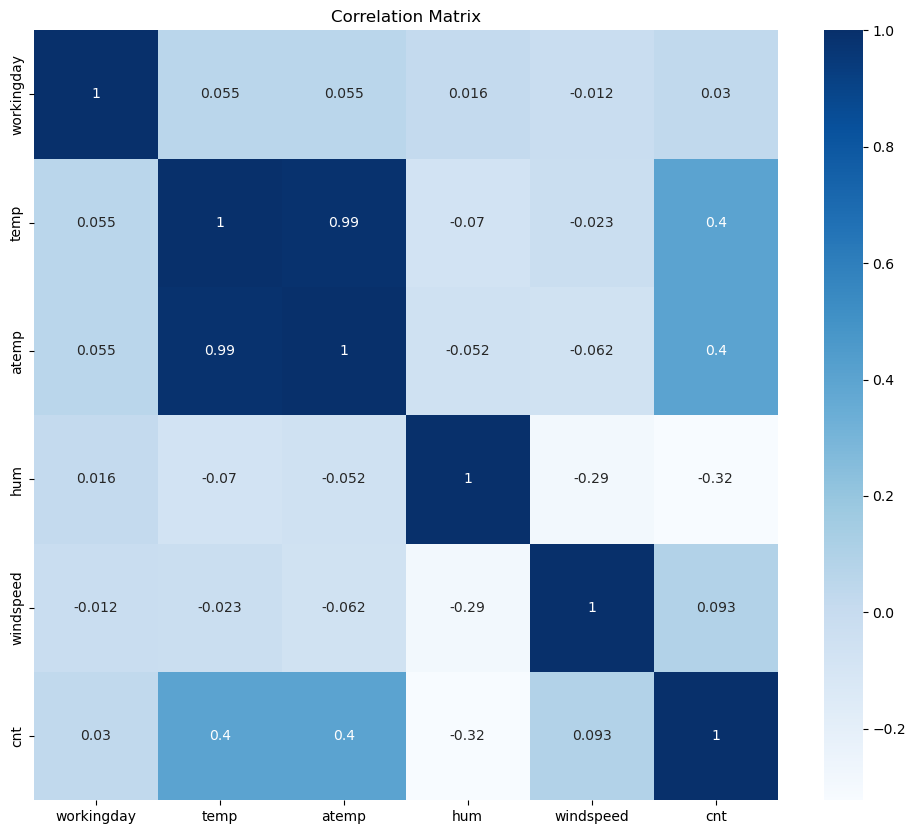

In [21]:
#Numerical variables and their co-relation matrix
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

### Interpretation:
Correlations: Various variables such as temperature, perceived temperature, humidity, time of day, month, and weather conditions show some correlation with bike rental numbers. These variables in combination influence the demand for bike rentals, contributing to its variance.

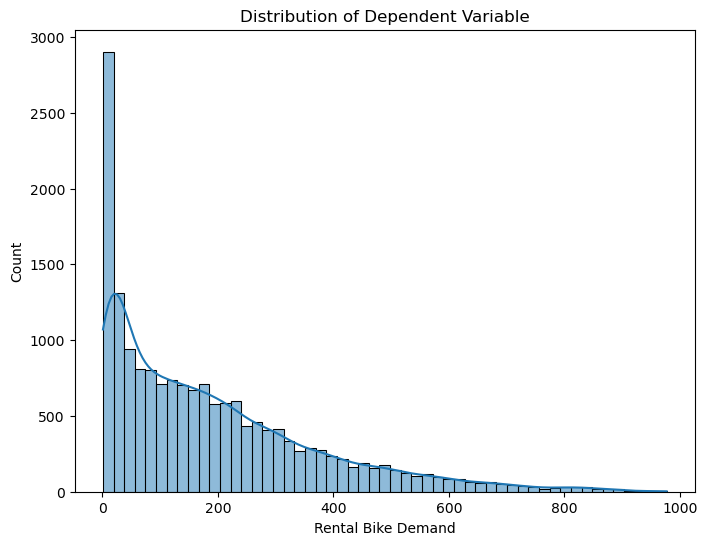

In [17]:
#Distribution of Depdendent variable
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='cnt', kde=True)
plt.title("Distribution of Dependent Variable")
plt.xlabel("Rental Bike Demand")
plt.ylabel("Count")
plt.show()

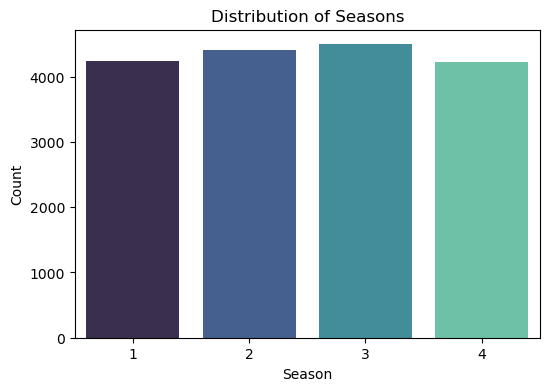

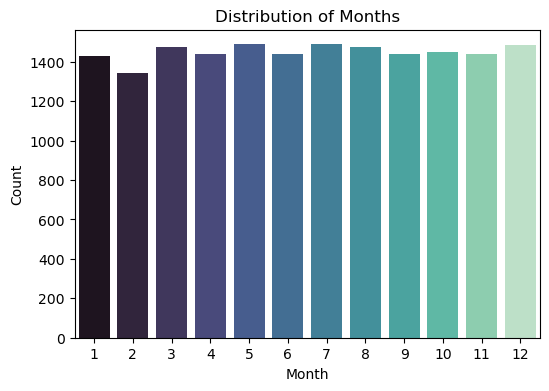

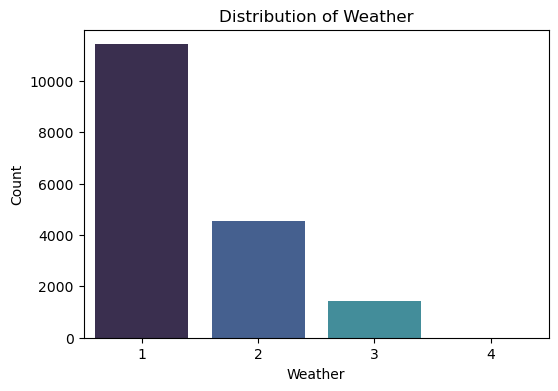

In [31]:
#Count distribution of categorical independent variables
#Independent categorical variables= ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit']

data = pd.read_csv(r"C:\Users\User15\OneDrive\Desktop\Data Analysis\bike.csv")
data = data.drop(['instant', 'casual', 'registered'], axis=1)
plt.figure(figsize=(6, 4))
#sns.color_palette("mako", as_cmap=True)
sns.countplot(data=data, x='season', palette="mako")
plt.title("Distribution of Seasons")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
#sns.color_palette("mako", as_cmap=True)
sns.countplot(data=data, x='mnth', palette="mako")
plt.title("Distribution of Months")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
#sns.color_palette("mako", as_cmap=True)
sns.countplot(data=data, x='weathersit', palette="mako")
plt.title("Distribution of Weather")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()

### Interpretation:
Seasonal Trends: There is a noticeable difference in the number of bike rentals across seasons. Summer and fall see a significant increase in rentals compared to the numbers during spring and winter.

Monthly Trends: Throughout the year, bike rental demand varies, peaking in the summer months and reducing during the winter.

Weather Impact: Weather conditions play an important role in bike rental demand. Clear or slightly cloudy days encourage more rentals, whereas misty or cloudy conditions see fewer riders. The lowest rental counts occurs during adverse weather such as light snow, heavy rain, ice pellets, thunderstorms, snow, or fog.

## 3.3 Feature Selection

**Temporal Patterns:** The features such as season, month, and hour were chosen to capture the temporal variations in bike rental demand. These periods shows different usage patterns influenced by weather, holidays, and commuting habits.

**Annual Trends:** By including the year variable, we can identify overall trends or changes in bike rental demand over the dataset span from 2011 to 2012.

**Day Type Variations:** The variables for holidays, weekdays, and working days are included to account for differences in bike rental demand related to daily routines, leisure activities, and commuting patterns.

**Weather Conditions:** The weather situation variable offers insight into various weather conditions that significantly impact outdoor activities ecspecially biking. This feature helps us evaluate how different weather scenarios influence bike rental demand.

**Weather-Related Factors:** Temperature, perceived temperature, humidity, and windspeed were selected for their direct impact on people's comfort and perception of weather. These variables affect individuals' decisions to use rental bikes, allowing us to capture the influence of weather on bike rental demand.

## 3.4 Models and their Comparisions

In [36]:
data = pd.read_csv(r"C:\Users\User15\OneDrive\Desktop\Data Analysis\bike.csv")
data = data.drop(['instant', 'casual', 'registered'], axis=1)
data['dteday'] = pd.to_datetime(data['dteday'])

#Defining dependent and independent variables
#independent = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
#dependent = 'cnt'
#X = data[independent]
#y = data[dependent]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [42]:
#one-hot coding for categorical variabes
#X = pd.get_dummies(X, columns=['season', 'mnth', 'hr', 'weekday', 'weathersit'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model
#Three models were selected: Linear regression, Gradient Boosting Regression and Random Foster Regression

#Linear Regression
Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)
Pred_1 = Model_1.predict(X_test)
Pred_1

array([449.3036328 , 162.2958197 ,   5.1551947 , ...,  87.51249671,
       199.9989447 , 256.8114447 ])

In [38]:
#Gradient Boosting Regression
Model_2 = GradientBoostingRegressor()
Model_2.fit(X_train, y_train)
Pred_2 = Model_2.predict(X_test)
Pred_2

array([418.72740917, 124.05843116,  25.56813421, ..., 131.33380619,
       196.64020251, 228.273707  ])

In [39]:
#Random Foster Regression
Model_3 = RandomForestRegressor()
Model_3.fit(X_train, y_train)
Pred_3 = Model_3.predict(X_test)
Pred_3

array([406.86, 123.04,  14.71, ...,  85.55, 323.27, 196.87])

In [40]:
#Comparions of three models: Model mean square error was calculated to compare the matric between models
mse_model_1 = mean_squared_error(y_test, Pred_1)
mse_model_2 = mean_squared_error(y_test, Pred_2)
mse_model_3 = mean_squared_error(y_test, Pred_3)

print("Linear Regression:")
print("MSE:", mse_model_1)
print()

print("Gradient Boosting Regression:")
print("MSE:", mse_model_2)
print()

print("Random Forest Regression:")
print("MSE:", mse_model_3)

Linear Regression:
MSE: 10090.449113953558

Gradient Boosting Regression:
MSE: 6235.500529033464

Random Forest Regression:
MSE: 2647.887010998306


### Interpretation:
Out of the three models: Linear Regression, Random Forest Regression, and Gradient Boosting Regression, the Random Forest Regression model achieved the lowest Mean Square Error (MSE). This indicates that the Random Forest Regression model provided the most accurate predictions for rental bike demand. Consequently, it can be concluded that the Random Forest Regression model is the comparatively better-performing model for forecasting bike rental demand considering single matrice. Yet, all other relvant matrices can be involved and compared to predict the best fit model for the prediction.

## 3.5 Discussion

The variables included in the models play a crucial role in the prediction accuracy. For the Random Forest Regression model, which achieved the lowest MSE, we can examine feature importance to determine the key factors influencing these predictions. 

Key factors impacting predictions include:

- **Temperature (temp):** Higher temperatures lead to increased bike rentals.
- **Hour of the day (hr):** Certain hours, such as rush hours or lunch breaks, experience higher demand.
- **Season (season):** Demand varies by season, with spring and summer seeing higher usage.
- **Day of the week (weekday):** Different demand patterns emerge on weekdays compared to weekends.
- **Weather situation (weathersit):** Favorable weather conditions boost demand.

Additional data that could enhance prediction performance:

- **Bike availability:** Information on bike availability at various times or locations.
- **Location-based factors:** Proximity to attractions, bike infrastructure, or population density.
- **Public holidays:** Information on holidays or events affecting demand.
- **Tourist data:** Insights on tourists and tourist events impacting demand.